In [ ]:
import gdown
import pandas as pd

file_id = "file_id"
output = "file_name.csv"

# Download the file
gdown.download(f"https://drive.google.com/uc?id={file_id}", output, quiet=False)

# Load into Pandas
df = pd.read_csv(output)
print(df.head())


Downloading...
From: https://drive.google.com/uc?id=1f_l3yBjwM5mPebk-zoKcdFKHglGDLG6d
To: c:\Users\pooya\Documents\Python\Mar_cls\octopus_churn_case_study.csv
100%|██████████| 1.57M/1.57M [00:01<00:00, 1.51MB/s]


   anonymised_supplypoint_id  anonymised_customer_id  signup_id  \
0                    20816.0                   27518      27518   
1                    24793.0                   30542      30542   
2                    14807.0                   19106      19106   
3                    34020.0                   29626      29626   
4                    22669.0                   28719      28719   

      sales_channel anonymised_sales_subchannel  has_promo_code  \
0            Direct                 ed168885785           False   
1  Price Comparison                 4c5627f1c90           False   
2  Price Comparison                 4c5627f1c90           False   
3  Price Comparison                 4c5627f1c90           False   
4            Direct                 ed168885785           False   

   has_referral_code supply_province  age_of_customer sex_of_customer  \
0              False              TV             62.0               M   
1              False              BR            

In [8]:
import pandas as pd
from datetime import datetime
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv("file_name.csv")
df.head()

,anonymised_supplypoint_id,anonymised_customer_id,signup_id,sales_channel,anonymised_sales_subchannel,has_promo_code,has_referral_code,supply_province,age_of_customer,sex_of_customer,type_of_voltura_incoming,first_product_category,last_product_category,date_of_signup,supply_start_date,supply_end_date,has_churned
0,20816.0,27518,27518,Direct,ed168885785,False,False,TV,62.0,M,NaN,FIX,FIX,2023-06-20,2023-08-01,NaN,False
1,24793.0,30542,30542,Price Comparison,4c5627f1c90,False,False,BR,41.0,M,NaN,FIX,FIX,2023-06-30,2023-08-01,2023-08-31,True
2,14807.0,19106,19106,Price Comparison,4c5627f1c90,False,False,NU,68.0,M,NaN,FLEX,FLEX,2023-05-11,2023-07-01,NaN,False
3,34020.0,29626,29626,Price Comparison,4c5627f1c90,False,False,AG,53.0,M,NaN,FIX,FLEX,2023-06-27,2023-08-01,NaN,False
4,22669.0,28719,28719,Direct,ed168885785,False,False,MI,51.0,M,NaN,FIX,FLEX,2023-06-23,2023-08-01,NaN,False


In [11]:
df.dtypes

anonymised_supplypoint_id      float64
anonymised_customer_id           int64
signup_id                        int64
sales_channel                   object
anonymised_sales_subchannel     object
has_promo_code                    bool
has_referral_code                 bool
supply_province                 object
age_of_customer                float64
sex_of_customer                 object
type_of_voltura_incoming        object
first_product_category          object
last_product_category           object
date_of_signup                  object
supply_start_date               object
supply_end_date                 object
has_churned                       bool
dtype: object

In [12]:
df=df.drop(["has_promo_code","has_referral_code"],axis=1)

In [13]:
df.shape

(13883, 15)

In [14]:
print("number of null values in sales_channel column is ",df.sales_channel.isnull().sum())
df.sales_channel.value_counts()

number of null values in sales_channel column is  0


sales_channel
Price Comparison    7831
Direct              6013
Field Sales           36
New tenant             3
Name: count, dtype: int64

In [15]:
print("number of null values in supply_province column is ",df.supply_province.isnull().sum())
print("number of unique supply_province is ",df.supply_province.nunique())
df.supply_province.value_counts()

number of null values in supply_province column is  562
number of unique supply_province is  106


supply_province
RM    882
MI    880
TO    568
CA    461
CT    356
     ... 
VV     25
AO     20
BZ     20
FM     19
IS     12
Name: count, Length: 106, dtype: int64

In [16]:
print("number of null values in supply_province column is ",df.sex_of_customer.isnull().sum())
df.sex_of_customer.value_counts()

number of null values in supply_province column is  0


sex_of_customer
M    8800
F    5083
Name: count, dtype: int64

In [17]:
print("number of null values in age_of_customer column is ",df.age_of_customer.isnull().sum())
print("Minimum age of customers is ", df.age_of_customer.min())
print("Maximum age of customers is ", df.age_of_customer.max())

number of null values in age_of_customer column is  3
Minimum age of customers is  20.0
Maximum age of customers is  107.0


In [18]:
df=df[df["age_of_customer"].notna()]

In [19]:
df["supply_start_date"]=pd.to_datetime(df["supply_start_date"])
df["supply_end_date"]=pd.to_datetime(df["supply_end_date"])

In [20]:
df["supply_start_year_month"]=df['supply_start_date'].dt.strftime('%Y-%m')
df["supply_end_year_month"]=df['supply_end_date'].dt.strftime('%Y-%m')

In [21]:
df['start_to_end_days'] = (df['supply_end_date'] - df['supply_start_date']).dt.days
df['start_to_end_days'] = df.apply(
    lambda row: (datetime.now() - row['supply_start_date']).days if pd.isnull(row['start_to_end_days']) else row['start_to_end_days'],
    axis=1
)

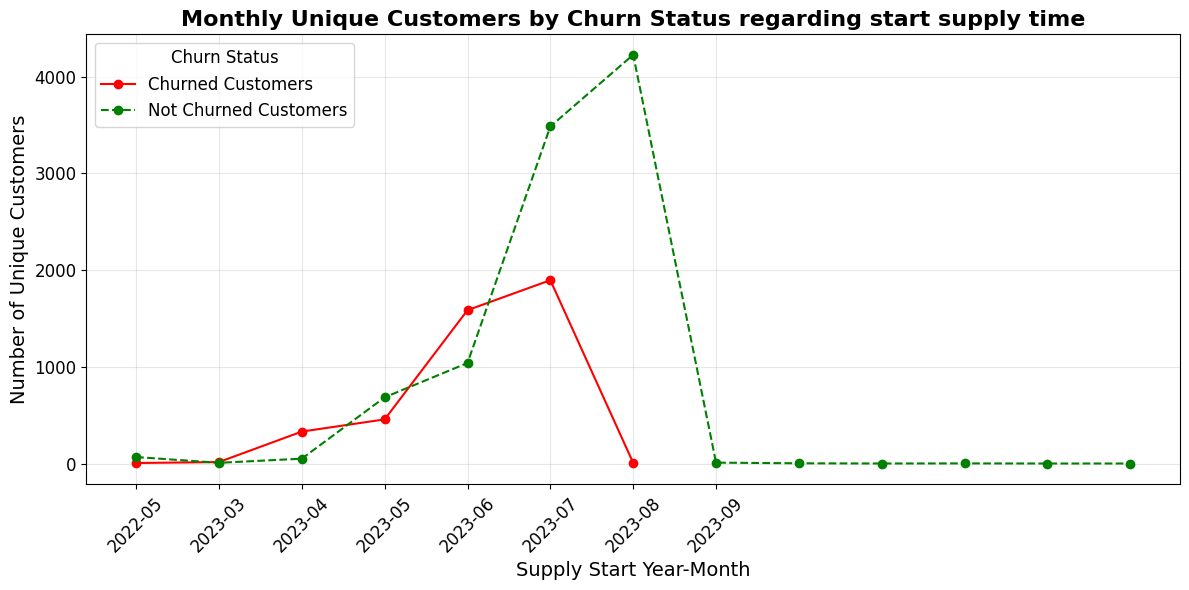

In [22]:
plt.figure(figsize=(12, 6))
churned_customers = df[df["has_churned"] == True].groupby("supply_start_year_month")["anonymised_customer_id"].nunique()
not_churned_customers = df[df["has_churned"] == False].groupby("supply_start_year_month")["anonymised_customer_id"].nunique()

# Plot with enhancements
churned_customers.plot(kind="line", marker="o", linestyle="-", color="red", label="Churned Customers")
not_churned_customers.plot(kind="line", marker="o", linestyle="--", color="green", label="Not Churned Customers")

# Add titles and labels
plt.title("Monthly Unique Customers by Churn Status regarding start supply time", fontsize=16, fontweight="bold")
plt.xlabel("Supply Start Year-Month", fontsize=14)
plt.ylabel("Number of Unique Customers", fontsize=14)

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add grid
plt.grid(alpha=0.3)

# Add legend
plt.legend(title="Churn Status", title_fontsize=12, fontsize=12, loc="upper left")

# Tight layout
plt.tight_layout()

# Show the plot
plt.show()

In [23]:
fig = px.box(df, x='has_churned', y = 'start_to_end_days')

# Update yaxis properties
fig.update_yaxes(title_text='Duration days', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>duration vs Churn</b>',
)

fig.show()

In [24]:
bins = [19, 40, 70, 120]  
labels = [1, 2, 3] 

# Transform age into categories
df['age'] = pd.cut(df['age_of_customer'], bins=bins, labels=labels)

In [25]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

g_labels = ['Male', 'Female']
c_labels = ['No', 'Yes']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])

# Add Pie chart for Gender distribution
fig.add_trace(go.Pie(labels=g_labels, values=df['sex_of_customer'].value_counts(), name="Gender",
                     marker=dict(colors=['#8b008b','#f8ffb6'])), 1, 1)

# Add Pie chart for Churn distribution
fig.add_trace(go.Pie(labels=c_labels, values=df['has_churned'].value_counts(), name="Churn",
                     marker=dict(colors=['#FFD700', '#32CD32'])), 1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name", textinfo="percent+label", textfont_size=16)

# Update Layout with custom title and annotations
fig.update_layout(
    title_text="Gender and Churn Distributions",
    title_x=0.5,  # Title centered
    title_font_size=24,  # Larger title font size
    title_font_family="Arial, sans-serif",  # Font family for title
    annotations=[dict(text='Gender', x=0.16, y=0.5, font_size=20, showarrow=False, font_family="Arial"),
                 dict(text='Churn', x=0.84, y=0.5, font_size=20, showarrow=False, font_family="Arial")],
    margin=dict(t=50, b=50, l=50, r=50),  # Adjust margins for better spacing
    showlegend=True,  # Enable legend
    legend_title="Categories",
    legend=dict(x=0.5, y=0.95, orientation="h", xanchor="center")
)

fig.show()


31% of customers transitioned to a different company. The customer base consists of 36.6% females and 63.4% males.

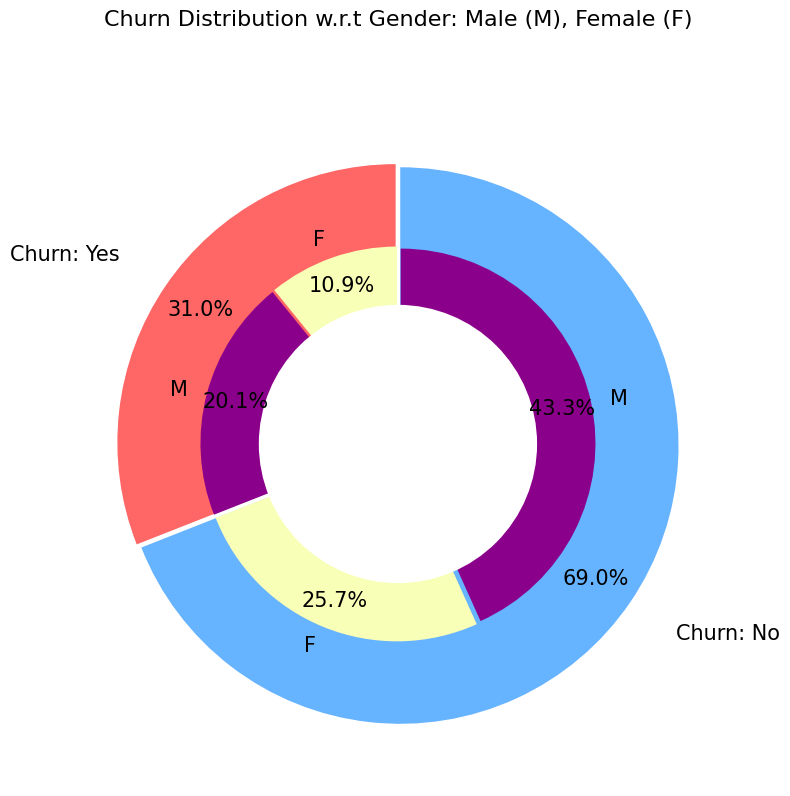

In [26]:

plt.figure(figsize=(8, 8))

# Labels and values
labels = ["Churn: Yes", "Churn: No"]
values = [df[(df['has_churned'] == True)].shape[0], df[(df['has_churned'] == False)].shape[0]]

labels_gender = ["F", "M", "F", "M"]
sizes_gender = [df[(df['has_churned'] == True) & (df['sex_of_customer'] == 'F')].shape[0], 
                df[(df['has_churned'] == True) & (df['sex_of_customer'] == 'M')].shape[0],
                df[(df['has_churned'] == False) & (df['sex_of_customer'] == 'F')].shape[0], 
                df[(df['has_churned'] == False) & (df['sex_of_customer'] == 'M')].shape[0]]

colors = ['#ff6666', '#66b3ff']
colors_gender = ['#f8ffb6', '#8b008b', '#f8ffb6', '#8b008b']
explode = (0.1, 0.1)  # Slightly explode both main categories for visual distinction
explode_gender = (0.1, 0.1, 0.1, 0.1)

# Text properties
textprops = {"fontsize": 15}

# Plot the main pie chart (Churn: Yes vs. Churn: No)
plt.pie(values, labels=labels, autopct='%1.1f%%', pctdistance=0.85, labeldistance=1.2, colors=colors, 
        startangle=90, frame=True, explode=explode, radius=10, textprops=textprops, counterclock=True)

# Plot the gender distribution for each churn category
plt.pie(sizes_gender, labels=labels_gender, colors=colors_gender, startangle=90, explode=explode_gender,
        radius=7, autopct='%1.1f%%', pctdistance=0.85, textprops=textprops, counterclock=True)

# Draw a circle in the center to create a donut effect
centre_circle = plt.Circle((0, 0), 5, color='black', fc='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Title for the plot
plt.title('Churn Distribution w.r.t Gender: Male (M), Female (F)', fontsize=16, y=1.1)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()

# Show the plot
plt.show()


There is a minimal difference in the percentage of customers who switched service providers. Both genders exhibited similar behavior regarding migrating to a different provider.

In [27]:
fig = px.histogram(df, x="has_churned", color="sales_channel", barmode="group", title="<b>Customer sales channel distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

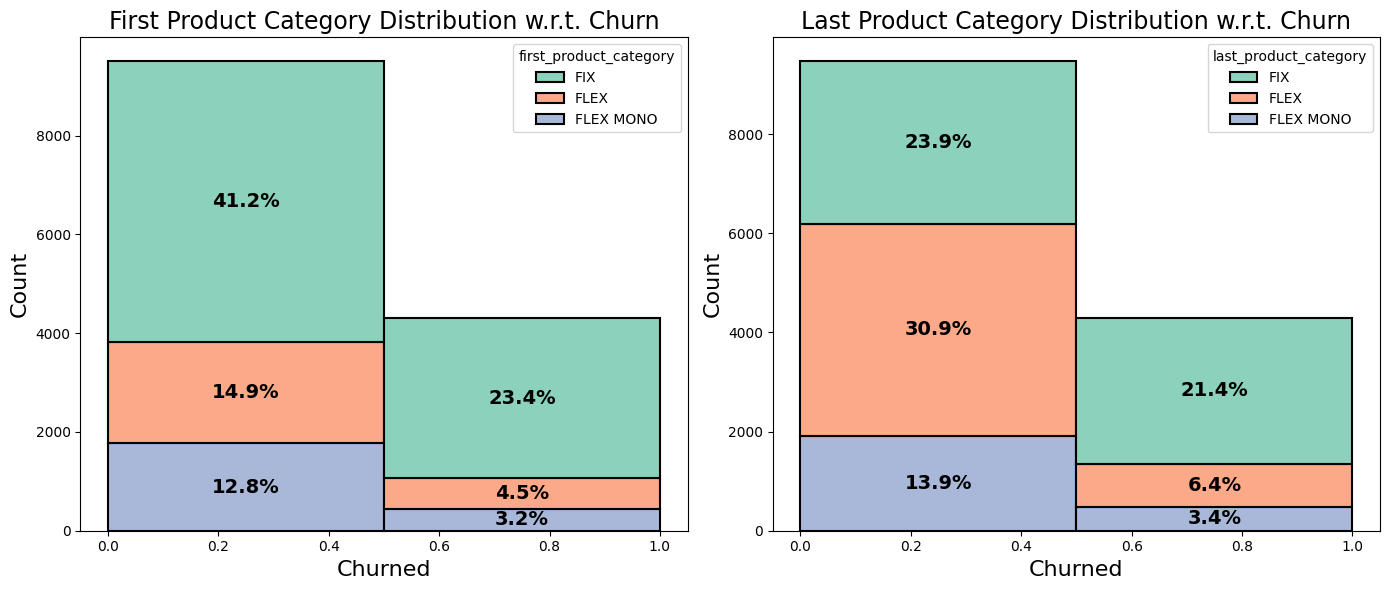

In [28]:
import seaborn as sns

# Prepare data for the first product category
df_notnull_firstproductcategory = df[df["first_product_category"].notna()]

# Prepare data for the last product category
df_notnull_lastproductcategory = df[df["last_product_category"].notna()]

# Set up the figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First histogram (First Product Category)
sns.histplot(data=df_notnull_firstproductcategory, 
             x="has_churned", 
             hue="first_product_category", 
             multiple="stack", 
             kde=False, 
             ax=axes[0], 
             binwidth=0.5, # Adjust the bin width for better appearance
             palette="Set2", # Use a more distinct color palette
             edgecolor='black', # Add black edges to bars
             linewidth=1.5)  # Increase the edge thickness for clearer distinction

# Calculate and add percentages for first product category
total_first = sum([patch.get_height() for patch in axes[0].patches])  # Total count for the first product category
for p in axes[0].patches:
    height = p.get_height()
    total = total_first
    percentage = height / total * 100
    # Calculate the correct position for each percentage annotation
    axes[0].annotate(f'{percentage:.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2. + p.get_y()),  # Center the percentage in the bar segment
                     ha='center', va='center', 
                     fontsize=14, color='black', fontweight='bold')

axes[0].set_title('First Product Category Distribution w.r.t. Churn', fontsize=17)
axes[0].set_xlabel('Churned', fontsize=16)
axes[0].set_ylabel('Count', fontsize=16)

# Second histogram (Last Product Category)
sns.histplot(data=df_notnull_lastproductcategory, 
             x="has_churned", 
             hue="last_product_category", 
             multiple="stack", 
             kde=False, 
             ax=axes[1], 
             binwidth=0.5, 
             palette="Set2", 
             edgecolor='black', 
             linewidth=1.5)

# Calculate and add percentages for last product category
total_last = sum([patch.get_height() for patch in axes[1].patches])  # Total count for the last product category
for p in axes[1].patches:
    height = p.get_height()
    total = total_last
    percentage = height / total * 100
    # Calculate the correct position for each percentage annotation
    axes[1].annotate(f'{percentage:.1f}%', 
                     (p.get_x() + p.get_width() / 2., p.get_height() / 2. + p.get_y()),  # Center the percentage in the bar segment
                     ha='center', va='center', 
                     fontsize=14, color='black', fontweight='bold')

axes[1].set_title('Last Product Category Distribution w.r.t. Churn', fontsize=17)
axes[1].set_xlabel('Churned', fontsize=16)
axes[1].set_ylabel('Count', fontsize=16)

# Adjust layout for better spacing
plt.tight_layout()

# Display the plot
plt.show()


In [29]:
df["product_change"]=df["first_product_category"]+"-to-"+df["last_product_category"]

In [30]:
df_notna_productchange=df[df["product_change"].notna()]
fig = px.histogram(df_notna_productchange, x="has_churned", color="product_change", barmode="group", title="<b>Customer sales channel distribution<b>")
fig.update_layout(width=700, height=500, bargap=0.1)
fig.show()

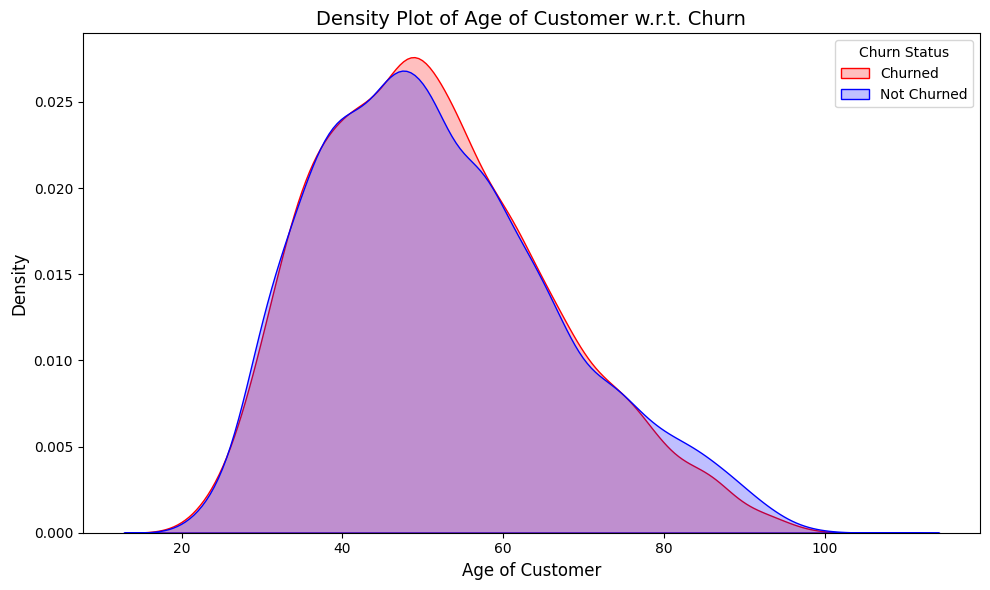

In [31]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['has_churned'] == True], x='age_of_customer', fill=True, color='red', label='Churned')
sns.kdeplot(data=df[df['has_churned'] == False], x='age_of_customer', fill=True, color='blue', label='Not Churned')

# Adding titles and labels
plt.title('Density Plot of Age of Customer w.r.t. Churn', fontsize=14)
plt.xlabel('Age of Customer', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend(title='Churn Status')

# Show the plot
plt.tight_layout()
plt.show()

In [32]:
fig = px.box(df, x='has_churned', y = 'age_of_customer')

# Update yaxis properties
fig.update_yaxes(title_text='Age', row=1, col=1)
# Update xaxis properties
fig.update_xaxes(title_text='Churn', row=1, col=1)

# Update size and title
fig.update_layout(autosize=True, width=750, height=600,
    title_font=dict(size=25, family='Courier'),
    title='<b>Age vs Churn</b>',
)

fig.show()

In [33]:
df['date_of_signup'] = pd.to_datetime(df['date_of_signup'])

# Duration Features
df['signup_to_start_days'] = (df['supply_start_date'] - df['date_of_signup']).dt.days
df['total_service_days'] = df.apply(
    lambda row: (row['supply_end_date'] if row['has_churned'] else datetime.now()) - row['date_of_signup'], axis=1
).dt.days


# Recency Features
df['days_since_last_activity'] = df.apply(
    lambda row: (row['supply_end_date'] if row['has_churned'] else datetime.now()) - row['supply_start_date'], axis=1
).dt.days



In [34]:
df.head().T

,0,1,2,3,4
anonymised_supplypoint_id,20816.0,24793.0,14807.0,34020.0,22669.0
anonymised_customer_id,27518,30542,19106,29626,28719
signup_id,27518,30542,19106,29626,28719
sales_channel,Direct,Price Comparison,Price Comparison,Price Comparison,Direct
anonymised_sales_subchannel,ed168885785,4c5627f1c90,4c5627f1c90,4c5627f1c90,ed168885785
supply_province,TV,BR,NU,AG,MI
age_of_customer,62.0,41.0,68.0,53.0,51.0
sex_of_customer,M,M,M,M,M
type_of_voltura_incoming,NaN,NaN,NaN,NaN,NaN
first_product_category,FIX,FIX,FLEX,FIX,FIX


In [35]:
df_with_dummies = pd.get_dummies(df, columns=['sales_channel','supply_province','sex_of_customer','product_change'])

In [36]:
db=df_with_dummies.drop(["anonymised_supplypoint_id","anonymised_customer_id","signup_id","anonymised_sales_subchannel",
                     "type_of_voltura_incoming","first_product_category","last_product_category","date_of_signup",
                      "supply_start_date","supply_end_date","age_of_customer","supply_start_year_month","supply_end_year_month"
                     ],axis=1)

In [37]:
db

,has_churned,start_to_end_days,age,signup_to_start_days,total_service_days,days_since_last_activity,sales_channel_Direct,sales_channel_Field Sales,sales_channel_Price Comparison,supply_province_AG,...,sex_of_customer_M,product_change_FIX-to-FIX,product_change_FIX-to-FLEX,product_change_FIX-to-FLEX MONO,product_change_FLEX MONO-to-FIX,product_change_FLEX MONO-to-FLEX,product_change_FLEX MONO-to-FLEX MONO,product_change_FLEX-to-FIX,product_change_FLEX-to-FLEX,product_change_FLEX-to-FLEX MONO
0,False,558.0,2,42,600,558,True,False,False,False,...,True,True,False,False,False,False,False,False,False,False
1,True,30.0,2,32,62,30,False,False,True,False,...,True,True,False,False,False,False,False,False,False,False
2,False,589.0,2,51,640,589,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
3,False,558.0,2,35,593,558,False,False,True,True,...,True,False,True,False,False,False,False,False,False,False
4,False,558.0,2,39,597,558,True,False,False,False,...,True,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13878,False,558.0,2,58,616,558,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
13879,False,619.0,2,41,660,619,False,False,True,False,...,True,True,False,False,False,False,False,False,False,False
13880,True,152.0,1,32,184,152,False,False,True,False,...,True,True,False,False,False,False,False,False,False,False
13881,False,589.0,1,44,633,589,False,False,True,False,...,False,True,False,False,False,False,False,False,False,False


In [38]:
db['has_churned'] = db['has_churned'].apply(lambda x: 1 if x == True else 0)

# Churn prediction models

In [39]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

X = db.drop(columns=['has_churned'])
y = db['has_churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the SVM model
model = SVC(random_state=42)

# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Precision: 1.0000
Recall: 0.9477
F1-score: 0.9731

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1916
           1       1.00      0.95      0.97       860

    accuracy                           0.98      2776
   macro avg       0.99      0.97      0.98      2776
weighted avg       0.98      0.98      0.98      2776



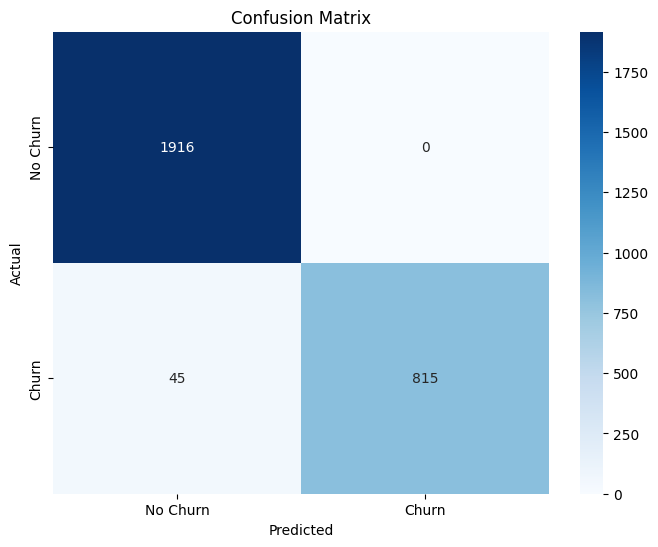

In [40]:
from sklearn.metrics import confusion_matrix

# Confusion Matrix for the test set
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


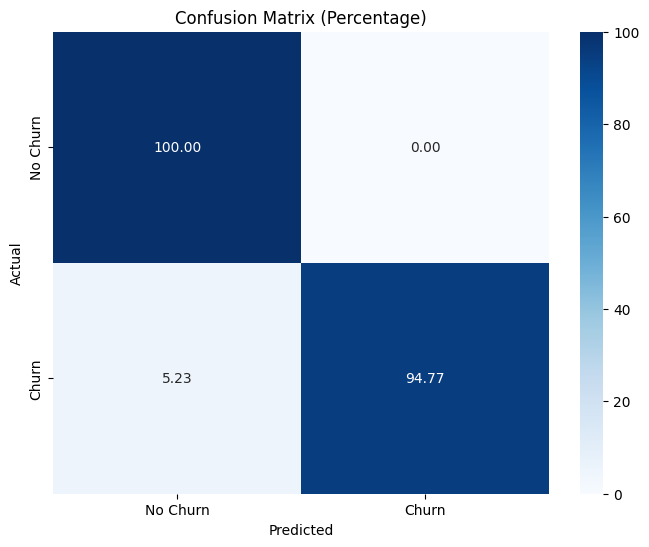

In [41]:
# Confusion Matrix for the test set
cm = confusion_matrix(y_test, y_pred)

# Normalize confusion matrix to show percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [42]:
from sklearn.linear_model import LogisticRegression

# Assuming X and y are your features and target variable
# Split the data into training and testing sets (80% training, 20% testing)
X = db.drop(columns=['has_churned'])
y = db['has_churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model on the training set
model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Calculate precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Display the results
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Precision: 1.0000
Recall: 0.9895
F1-score: 0.9947

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1916
           1       1.00      0.99      0.99       860

    accuracy                           1.00      2776
   macro avg       1.00      0.99      1.00      2776
weighted avg       1.00      1.00      1.00      2776



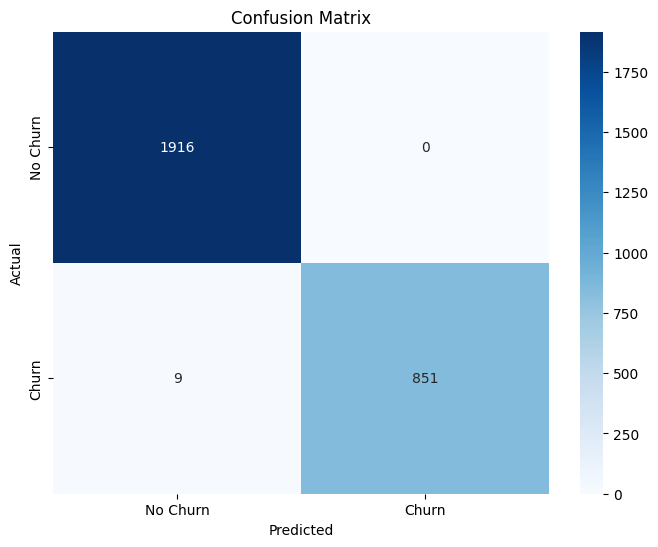

In [43]:
cm = confusion_matrix(y_test, y_pred)

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


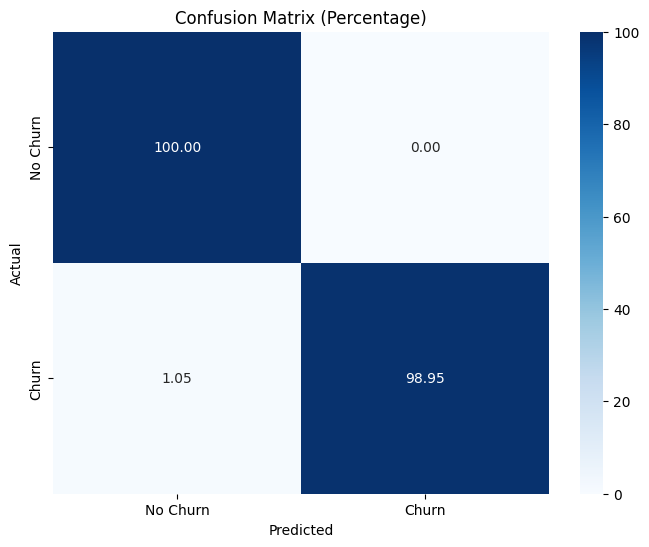

In [44]:
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


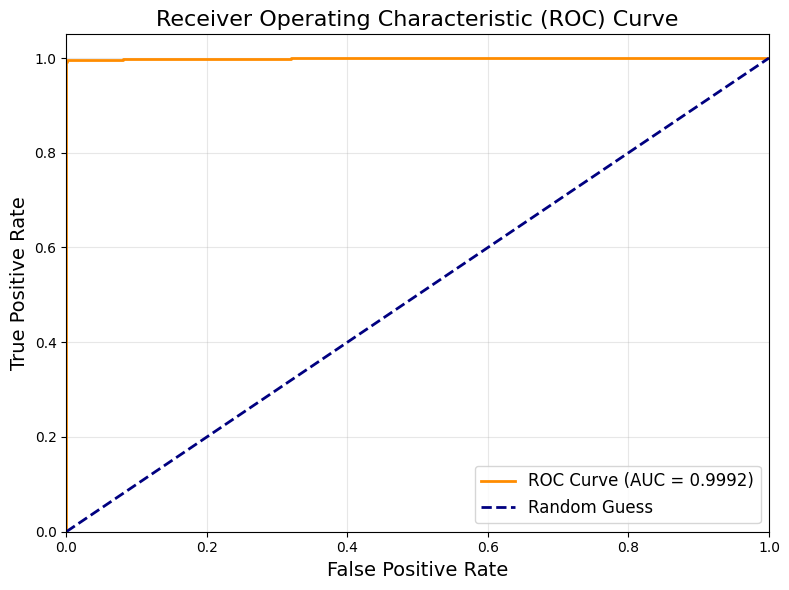

ROC AUC Score: 0.9992


In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]  # Extract probabilities for class 1

# Calculate ROC curve values: FPR (False Positive Rate), TPR (True Positive Rate), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC (Area Under the Curve)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Print AUC value
print(f"ROC AUC Score: {roc_auc:.4f}")


Training Set Metrics (via CV):
Precision: 0.9994, Recall: 0.9869, F1-Score: 0.9931

Test Set Metrics:
Precision: 1.0000, Recall: 0.9895, F1-Score: 0.9947

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1916
           1       1.00      0.99      0.99       860

    accuracy                           1.00      2776
   macro avg       1.00      0.99      1.00      2776
weighted avg       1.00      1.00      1.00      2776



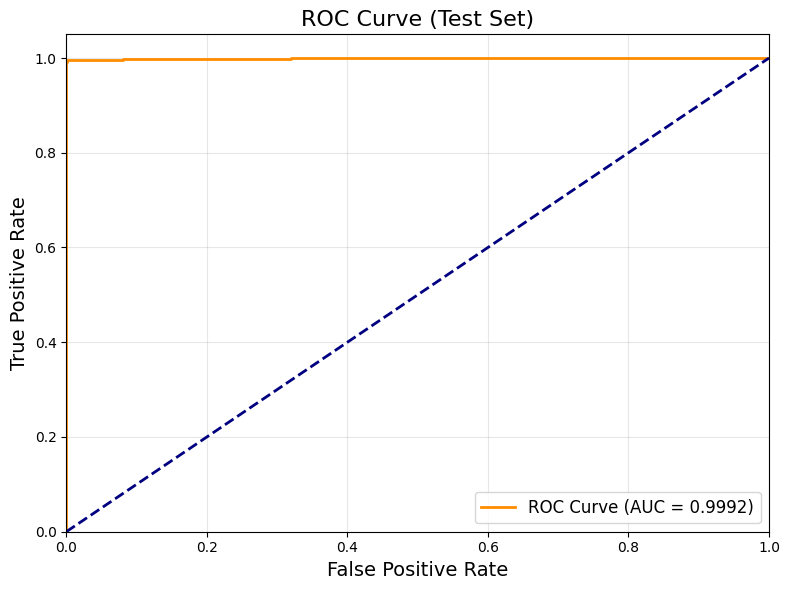

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, cross_val_predict
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Split the data into training and test sets
X = db.drop(columns=['has_churned'])
y = db['has_churned']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Initialize the Logistic Regression model
model = LogisticRegression(solver='liblinear', random_state=42)

# Step 4: Perform 5-Fold Cross-Validation on the Training Set
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Get cross-validated predictions and probabilities
y_train_pred = cross_val_predict(model, X_train_scaled, y_train, cv=cv, method='predict')
y_train_proba = cross_val_predict(model, X_train_scaled, y_train, cv=cv, method='predict_proba')[:, 1]

# Calculate performance metrics on the training set (from CV)
precision_train = precision_score(y_train, y_train_pred)
recall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)

print(f"Training Set Metrics (via CV):")
print(f"Precision: {precision_train:.4f}, Recall: {recall_train:.4f}, F1-Score: {f1_train:.4f}")

# Step 5: Train the model on the entire training set
model.fit(X_train_scaled, y_train)

# Step 6: Evaluate on the Test Set
y_test_pred = model.predict(X_test_scaled)
y_test_proba = model.predict_proba(X_test_scaled)[:, 1]

# Test set metrics
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"\nTest Set Metrics:")
print(f"Precision: {precision_test:.4f}, Recall: {recall_test:.4f}, F1-Score: {f1_test:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

# Step 7: Plot ROC Curve for Test Set
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=14)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('ROC Curve (Test Set)', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [53]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

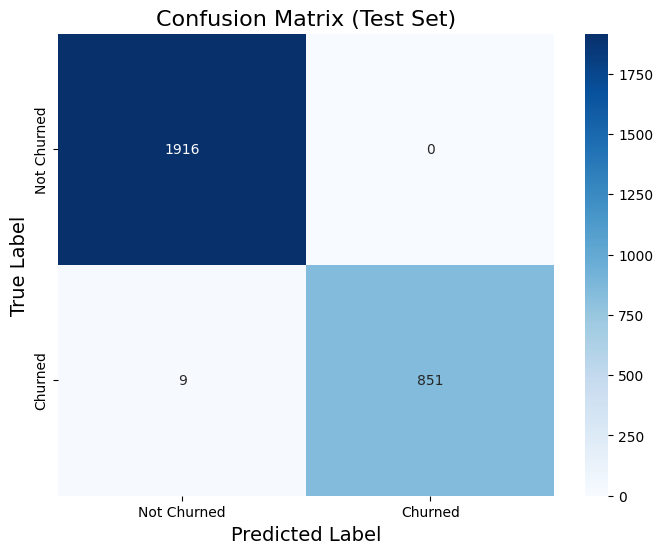


Test Set Metrics:
Precision: 1.0000
Recall: 0.9895
F1-score: 0.9947

Classification Report (Test Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1916
           1       1.00      0.99      0.99       860

    accuracy                           1.00      2776
   macro avg       1.00      0.99      1.00      2776
weighted avg       1.00      1.00      1.00      2776



In [54]:
cm = confusion_matrix(y_test, y_test_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# Plot the Confusion Matrix using seaborn for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Churned', 'Churned'], yticklabels=['Not Churned', 'Churned'])
plt.title('Confusion Matrix (Test Set)', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.show()

# Other metrics
precision_test = precision_score(y_test, y_test_pred)
recall_test = recall_score(y_test, y_test_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"\nTest Set Metrics:")
print(f"Precision: {precision_test:.4f}")
print(f"Recall: {recall_test:.4f}")
print(f"F1-score: {f1_test:.4f}")
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_test_pred))

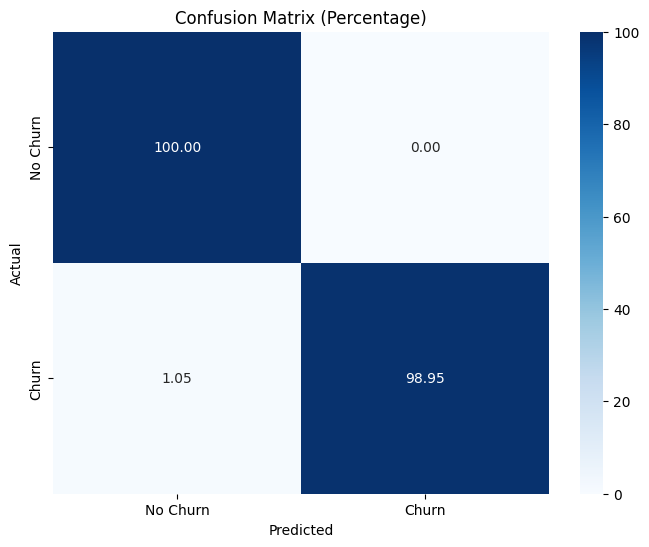

In [55]:
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plotting the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2f', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
